## Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

There is a dataset of human body temperatures: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm

## Is the distribution of body temperatures normal?
Plan:
1. Make assumption about the distribution;
 * Visualize data by using histogram and comparing with the theoretical distribution;
 * Calculat sample characteristic;
2. Test the hypothesis by using?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# reading given dataset

df = pd.read_csv('data/human_body_temperature.csv')

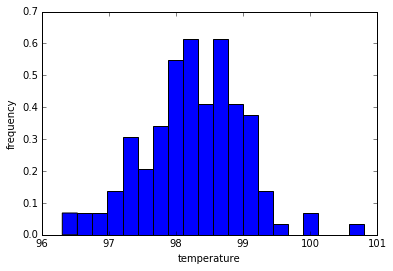

In [36]:
# Make assumption about the distribution
# Visualizing data by using histogram of frequency

fig, ax = plt.subplots()
ax.hist(np.array(df['temperature']), normed = True, bins = 20)
ax.set_xlabel('temperature')
ax.set_ylabel('frequency')

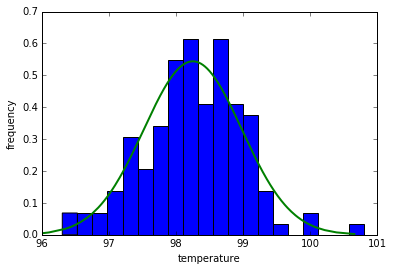

In [46]:
# the histogram above is close to normal distibution
# comparing with the theoretical distribution

mu, sigma = df['temperature'].mean(), df['temperature'].std()
s = np.sort(np.random.normal(mu, sigma, 1000))
fig, ax = plt.subplots()
ax.hist(np.array(df['temperature']), normed = True, bins = 20)
ax.set_xlabel('temperature')
ax.set_ylabel('frequency')
ax.plot(s, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(s - mu)**2 / (2 * sigma**2)), linewidth = 2)

In [39]:
# Calculating skewness and kurtosis: both of them should be close to zero

sk = df['temperature'].skew()
kur = df['temperature'].kurtosis()
print(sk, kur)

-0.004419131169 0.780457395034


In [50]:
# Test the hypothesis by using the Kolmogorov-Smirnov test

stats.kstest(np.array(df['temperature']), 'norm', args = (mu, sigma))
# The results mean that we can't reject null hypothesis that sample distribution is normal

KstestResult(statistic=0.064726850440472217, pvalue=0.64503073174386882)

## Is the true population mean really 98.6 degrees F?
Plan:
* Calculat the T-test for the mean of ONE group

In [51]:
stats.ttest_1samp(df['temperature'], 98.6)
# The results mean that we reject null hypothesis about population mean 98.6

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## At what temperature should we consider someone's temperature to be "abnormal"?
Plan:
    * computing confidence interval for the mean.

In [62]:
# getting critical value

crit = stats.norm.ppf(q = 0.975)


# computing confidence interval
error = crit * (sigma/np.sqrt(len(df['temperature'])))
CI = (mu - error, mu + error)
CI

(98.123196428181657, 98.375265110279898)

## Is there a significant difference between males and females in normal temperature?
Plan:
* Compute the Kolmogorov-Smirnov statistic on 2 samples.

In [72]:
# getting samples for males and females

dfm = df.loc[df['gender'] == 'M','temperature']
dff = df.loc[df['gender'] == 'F','temperature']

# calculating the Kolmogorov-Smirnov statistic

stats.ks_2samp(np.array(dfm), np.array(dff))

# Since pvalue 19,5 we can't reject hypothesis that samples are drawn from the same distribution, so there is no significant difference.

Ks_2sampResult(statistic=0.18461538461538457, pvalue=0.19539014047941772)